# Full-Precision Embeddings vs Quantized Embeddings

We compare full-precision embeddings with quantize embeddings, which speed up operations over vectors & reduce storage requirements.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

In [4]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5", trust_remote_code=True)

<All keys matched successfully>


In [84]:
s = ["poodle", "golden retriever", "chihuahua", "camaro", "challenger", "camry"]
s = [f"clustering: {x}" for x in s]
embeddings = model.encode(s)

Clustering embeddings shows neighborhoods arranged by semantic similarity

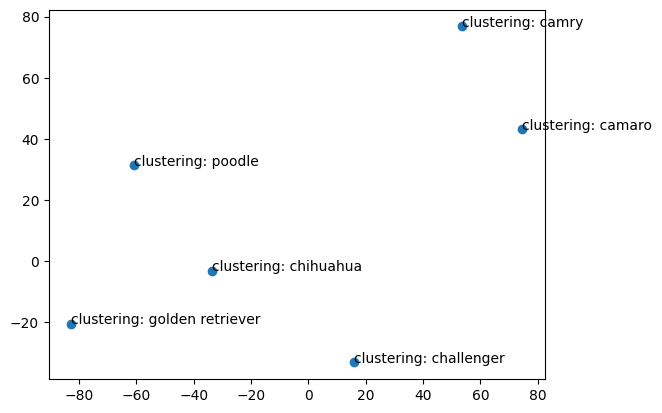

In [109]:
X = embeddings
X_tsne_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
plt.scatter(X_tsne_embedded[:,0], X_tsne_embedded[:,1])
for i, txt in enumerate(s):
    plt.annotate(txt, (X_tsne_embedded[i,0], X_tsne_embedded[i,1]))
plt.show()

In [105]:
def embedding_to_int8_manual(embs, verbose=False):
    """Computes binary embeddings (represented in int8) manually (same result as precision="binary" from sentence_transformers
    
    Encode (N,) dimensional float32 embeddings as (N,) dimensional bit embeddings, 
    then compress to (N//8) dimensional int8 embeddings"""

    res = []
    for i in range(len(embs)):
        bit_embedding = ''.join((embs[i,:]>0).astype(int).astype(str).tolist())
        subres = []
        for i in range(len(bit_embedding)//8):
            substr = bit_embedding[i*8:i*8+8]
            substr_int = int(substr, 2) - 128
            if verbose:
                print(substr, "-->", substr_int)
            subres.append(substr_int)
        res.append(subres)
    return np.array(res)

Here is the first embedding vector from the sample

In [107]:
head_vector = embeddings[0]
head_vector

array([ 4.51972298e-02,  1.62277734e+00, -4.46976089e+00, -1.12209201e+00,
       -7.39262104e-02,  4.73362595e-01, -7.70147026e-01,  7.51923025e-01,
       -1.24549288e-02, -1.55642307e+00, -1.94647896e+00,  4.81125981e-01,
        2.85901222e-02, -2.39004925e-01,  7.06814468e-01, -1.31085944e+00,
       -3.12752455e-01, -2.02350807e+00,  6.30524337e-01,  7.71184504e-01,
       -6.35414481e-01, -3.98600072e-01, -1.40579730e-01, -8.75206366e-02,
        2.97793317e+00,  4.41224039e-01, -9.02687013e-01,  6.46740377e-01,
        9.57218632e-02,  1.03751349e+00,  2.96589643e-01, -2.09775344e-01,
       -5.50945640e-01, -2.59235471e-01, -8.30961615e-02, -5.35871804e-01,
        9.32809055e-01,  3.90289158e-01,  1.45064104e+00,  9.28714097e-01,
        2.65543997e-01,  1.30631351e+00,  5.57419993e-02,  1.15457618e+00,
        1.18741012e+00, -1.68131065e+00,  5.05207777e-01,  1.93412173e+00,
        7.65339017e-01, -1.05885065e+00,  3.36682886e-01,  2.49362513e-01,
       -1.10172069e+00, -

This is the bit embedding encoding *approximate information* as the above vector. 

It encodes whether each float in the (768,) vector is negative (0) or positive (1)

In [86]:
head_vector_bitstring = ''.join((head_vector>0).astype(int).astype(str).tolist())
head_vector_bitstring

'110001010001101000110000110111100000111111111011101100111011110110010010110000111010100001011100110000111100000100101011001111110010001100111110001101111110111110010011010010110010101001000001000110101000001110100001000110001000010011111100010001001101111001101010001100110000100100010011100101011010101111101001010101110100010100010001110100100000111100001100101011111100111001101101100011110010100100100110111110011000110001010011111110111001111001111110001101000010110111010011100001011011100001111000101001110111100110010100101001000111111111000010001001001100100100001000110010110000100101110000111001110111101111000011110011010001001111111101111111101000000110000001001111000000111000100000000111110011010111110001100001101111000000000001101100010111111010100000'

This is the int8 compressed vector encoding *identical information* as the bit embedding

In [87]:
binary_embeddings[0]

array([  69, -102,  -80,   94, -113,  123,   51,   61,   18,   67,   40,
        -36,   67,   65,  -85,  -65,  -93,  -66,  -73,  111,   19,  -53,
        -86,  -63, -102,    3,   33, -104,    4,  124,  -60,   94,  -22,
        -77, -119, -109,   21,   43,  105,  -41,  -59, -111,   82, -113,
       -116,   47,   78,  -19,   15,  -87,  -90,  121,   12,  -45,  123,
         30,   -2,  -76,  -83,   83,    5,   56,   -8,   39,   -7,   20,
         36,   -1,   66,  -92,   73, -120,   75, -119,  -16,  103,   -5,
         67,   77, -109,  125,  126,    1,    1,  -68, -114,  -96,  -97,
        -75,  113,    6,  112, -127,   49,   -2,   32], dtype=int8)

The downstream use cases for embeddings still function on the binary embeddings

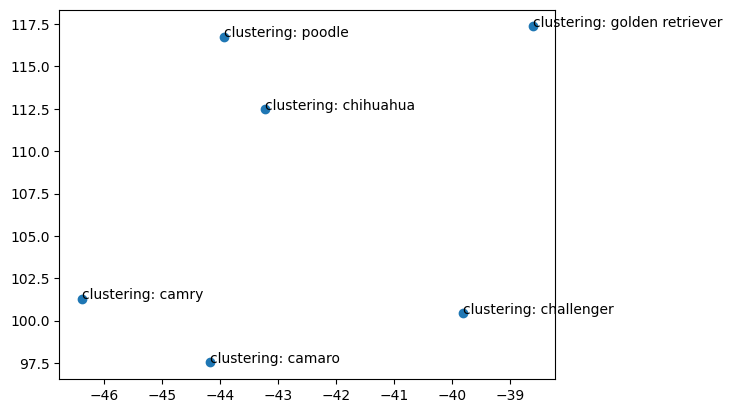

In [111]:
X = binary_embeddings
X_tsne_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
plt.scatter(X_tsne_embedded[:,0], X_tsne_embedded[:,1])
for i, txt in enumerate(s):
    plt.annotate(txt, (X_tsne_embedded[i,0], X_tsne_embedded[i,1]))
plt.show()